In [98]:
#imports
import random 
import numpy as np
import math
import matplotlib.pyplot as plt
import time  
from IPython.display import display, clear_output
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from matplotlib.cbook import get_sample_data
#professor code for plotting
def imscatter(x, y, image, ax=None, zoom=1):
    if ax is None:
        ax = plt.gca()
    try:
        image = plt.imread(image)
    except TypeError:
        # Likely already an array...
        pass
    im = OffsetImage(image, zoom=zoom)
    x, y = np.atleast_1d(x, y)
    artists = []
    for x0, y0 in zip(x, y):
        ab = AnnotationBbox(im, (x0, y0), xycoords='data', \
                            frameon=False)
        artists.append(ax.add_artist(ab))
    ax.update_datalim(np.column_stack([x, y]))
    ax.autoscale()
    return artists

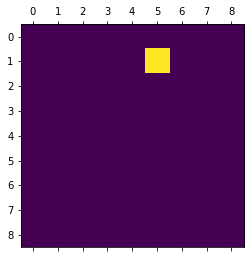

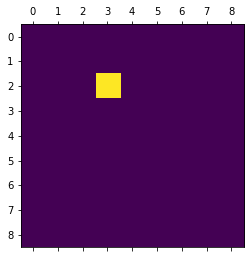

In [97]:
#where it needs fixing
#we can change if you would like how much or how little the placement of antibiotics is/color
#see stack overflow link for example
#need help combining to one board and making bacteria on the board
class board():
    def __init__(self, nrows = 9, ncols = 9):
        self.nrows = nrows
        self.ncols = ncols
        return
    
    def nutrients(self):
        nutrients = np.zeros(self.nrows*self.ncols)
        a = np.random.randint(0,nrows)
        b = np.random.randint(0,ncols)
        nutrients[a*b] = np.random.random()
        nutrients = nutrients.reshape((self.nrows, self.ncols))
        row_labels = range(self.nrows)
        col_labels = range(self.ncols)
        plt.matshow(nutrients)
        plt.xticks(range(self.ncols), col_labels)
        plt.yticks(range(self.nrows), row_labels)
        plt.show()
        return

    def antibiotics(self):
        anti = np.zeros(self.nrows*self.ncols)
        c = np.random.randint(0,nrows)
        d = np.random.randint(0,ncols)
        anti[c*d] = np.random.random()
        anti = anti.reshape((self.nrows, self.ncols))
        row_labels = range(self.nrows)
        col_labels = range(self.ncols)
        plt.matshow(anti)
        plt.xticks(range(self.ncols), col_labels)
        plt.yticks(range(self.nrows), row_labels)
        plt.show()
        return
        
    def toxins():#may take out
        pass

c = board(9,9)
c.nutrients()
c.antibiotics()
#https://stackoverflow.com/questions/10194482/custom-matplotlib-plot-chess-board-like-table-with-colored-cells

In [99]:
class bacteria():
    
    __slots__ = ['x', 'y', 'antibiotic_resistance_gene', 'nutrient_gene', 'temperature_gene', 'immune_resistance_gene']
    
    def __init__(self, x = random.randint(0,9),y = random.randint(0,9), gene_seed = 0, mutation_rate=0.1):
        """
        Creates new bacteria object with random position and genes
        :x: x position of bacteria
        :y: y position of bacteria
        :gene_seed: float value to add to all randomly initialized gene values
        :mutation_rate: the mutation rate for bacteria
        """
        self.x = x
        self.y = y
        
        #initialize all genes to random values between [0, 0.2] + gene_seed
        self.antibiotic_resistance_gene = np.random.rand()/5 + gene_seed
        self.nutrient_gene = np.random.rand()/5 + gene_seed
        self.temperature_gene = np.random.rand()/5 + gene_seed
        self.immune_resistance_gene = np.random.rand()/5 + gene_seed
        

        
        return
    
    def set_position(self, x, y):
        """
        Sets the position of self using passed arguments
        """
        self.x = x
        self.y = y
        return
    
    def movement(self):
        """
        Randomly move bacteria up to two units in the x and y directions
        """
        randomstepx = random.randint(-2,2)
        randomstepy = random.randint(-2,2)
        self.x = self.x + randomstepx
        if self.x < 20:
            self.x = 20
        if self.x > 100:
            self.x = 100
        self.y = self.y + randomstepy
        if self.y < 20:
            self.y = 20
        if self.y > 120:
            self.y = 120
        return
    
    def reproduce(self):
        """
        Returns a new bacteria with a gene seed of the mean of the current bacterias genes
        """
        newbac = bacteria(self.x,self.y, (self.antibiotic_resistance_gene+self.nutrient_gene+self.temperature_gene+self.immune_resistance_gene)/4)
        return newbac
    
    
    def mutate(self):
        """
        Randomly calculate if bacteria will mutate
        If true, randomly add from a N(0, 0.1) distribution
        """
        if np.random.rand() < mutation_rate:
            self.antibiotic_resistance_gene += 0.1 * np.random.randn()
            self.nutrient_gene += 0.1 * np.random.randn()
            self.temperature_gene += 0.1 * np.random.randn()
            self.immune_resistance_gene += 0.1 * np.random.randn()
    
    def death(self, external_condition_value):
        """
        Calculate something related to the current conditions the bacteria is experiencing to see if it dies based on its genes.
        :external_condition_value: could be anything such as temperature, antibiotics level, white blood cell count, etc
        """
        pass
    
    def draw(self):
        image_path = 'bacteria.jpg'
        imscatter(self.x, self.y, image_path, zoom=0.8)
        return

#we may want to just use dots instead of the picture^^^

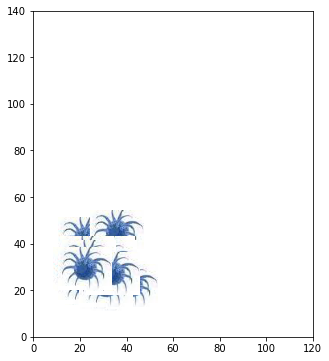

In [100]:
b = bacteria()
allbac = []
allbac.append(b)
for d in range(50):
    clear_output(wait=True)  
    plt.figure(figsize=(6, 6))    
    for ba in range(np.size(allbac)):
        allbac[ba].movement()
        allbac[ba].draw()
    if np.mod(d,10) == 1:
        for i in range(np.size(allbac)):
            cell = allbac[i].reproduce()
            allbac.append(cell)
    plt.axes().set_aspect('equal')
    plt.axes().set_xlim([-0,120])
    plt.axes().set_ylim([-0,140])
    plt.show()   
    time.sleep(0.001)  